In [51]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import warnings

In [42]:
#Suppressing warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

Extracting and Loading Data

In [43]:
#List of top financial institutions with their respective tickers and company names
financial_institutions = {
    'JPM': 'JPMorgan Chase & Co.',
    'BAC': 'Bank of America Corporation',
    'WFC': 'Wells Fargo & Company',
    'C': 'Citigroup Inc.',
    '601398.SS': 'Industrial and Commercial Bank of China'
}

#Downloading the historical stock prices from 2019 onwards
data = {}
for symbol in financial_institutions.keys():
    data[symbol] = yf.download(symbol, start='2019-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ARIMA Model

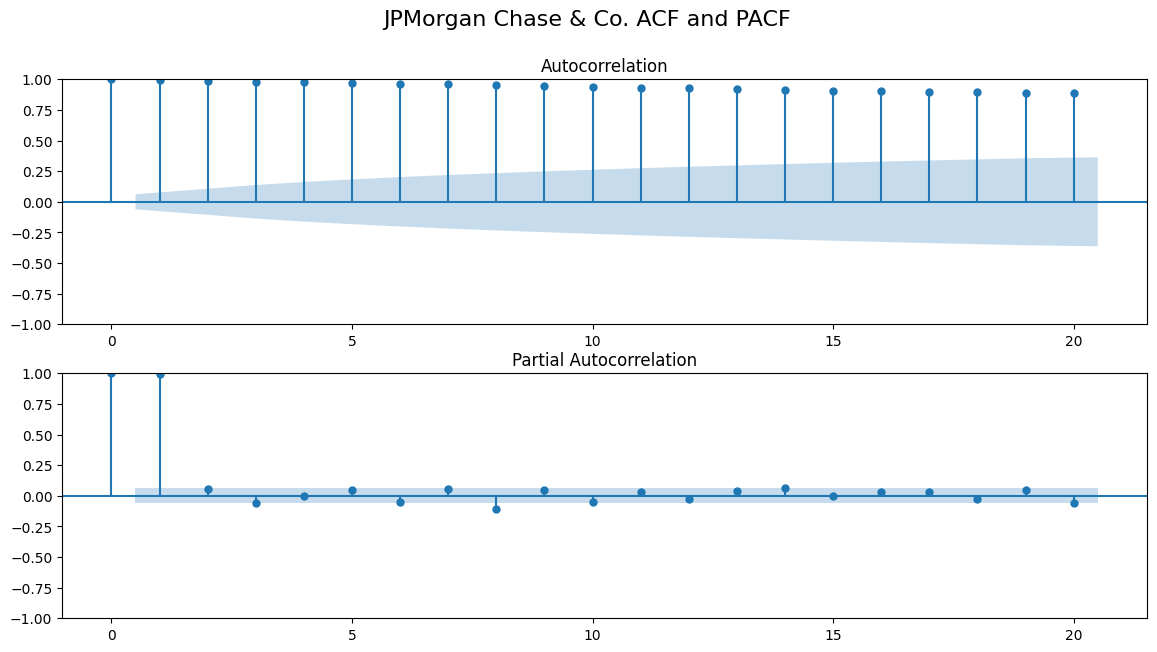

<ipython-input-44-ebb578ac40a3>:34: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100


JPMorgan Chase & Co. ARIMA Model Performance:
Root Mean Squared Error (RMSE): 14.718817989750155
Mean Absolute Error (MAE): 12.186578892018764


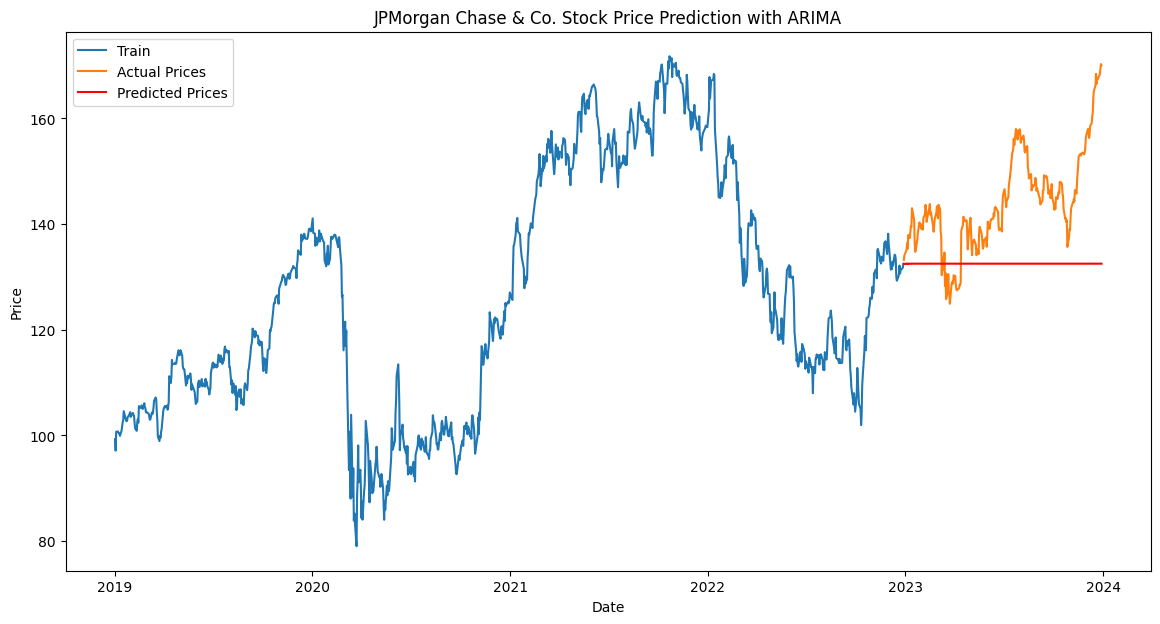

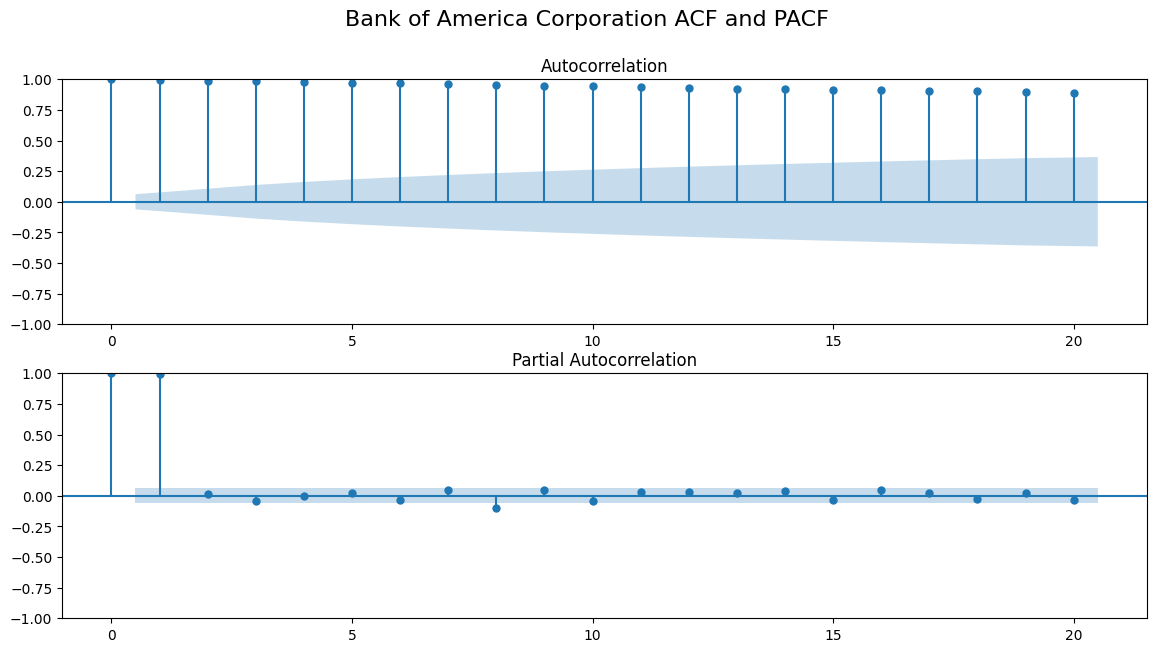

<ipython-input-44-ebb578ac40a3>:34: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100


Bank of America Corporation ARIMA Model Performance:
Root Mean Squared Error (RMSE): 3.9104563937774452
Mean Absolute Error (MAE): 3.501570408824313


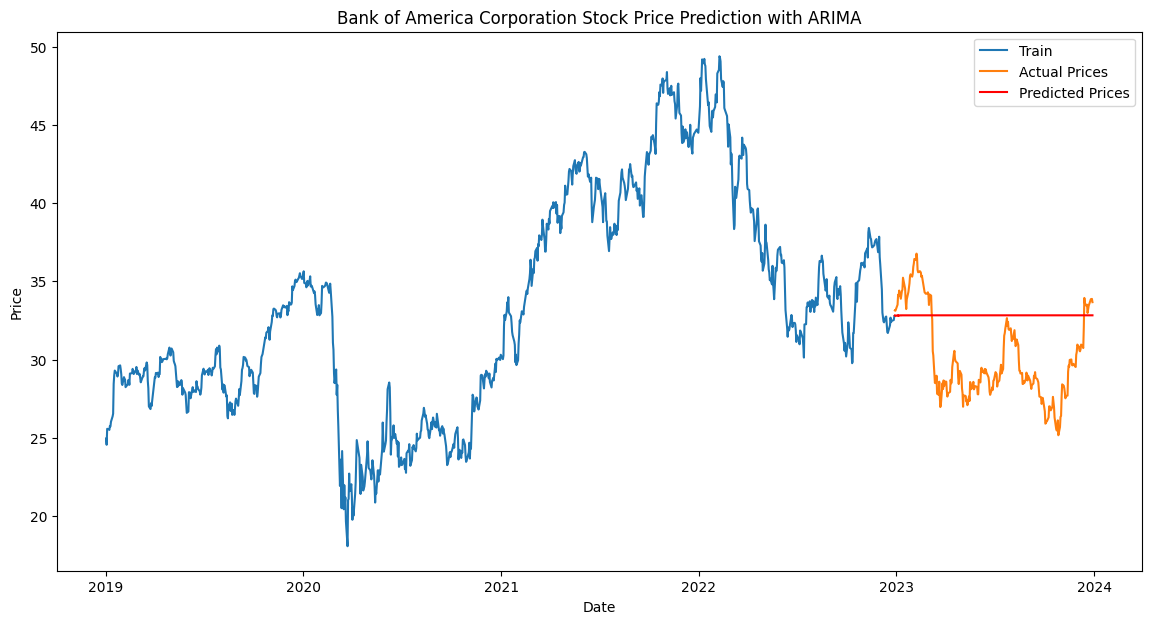

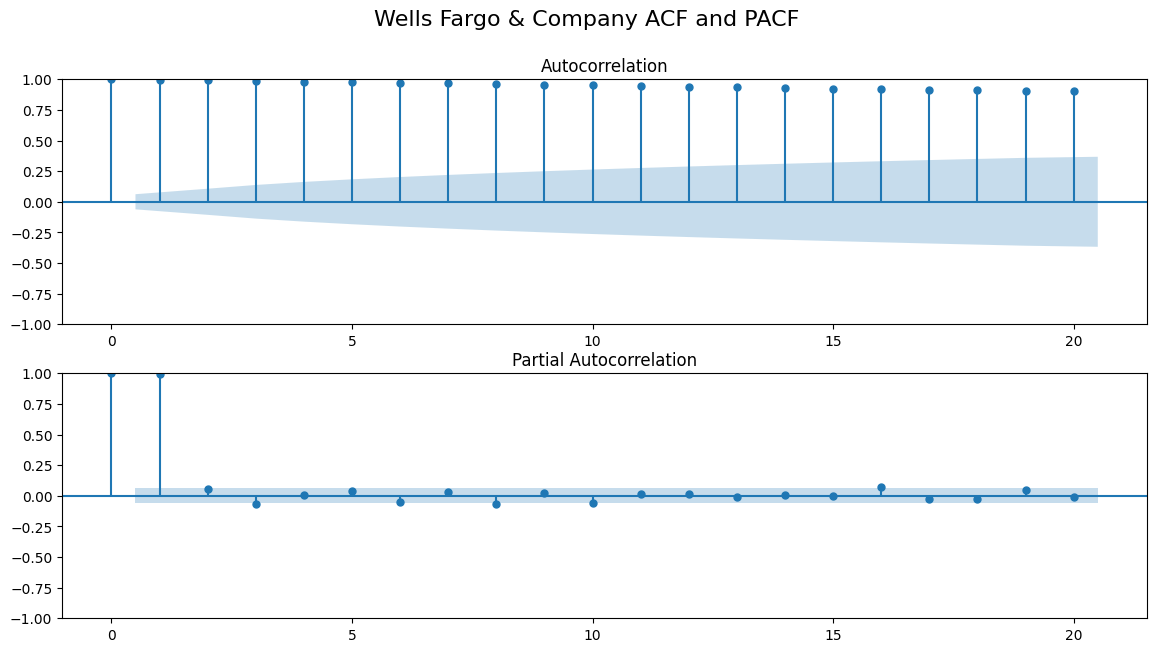

<ipython-input-44-ebb578ac40a3>:34: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100


Wells Fargo & Company ARIMA Model Performance:
Root Mean Squared Error (RMSE): 3.7037697283381004
Mean Absolute Error (MAE): 2.8385978062844375


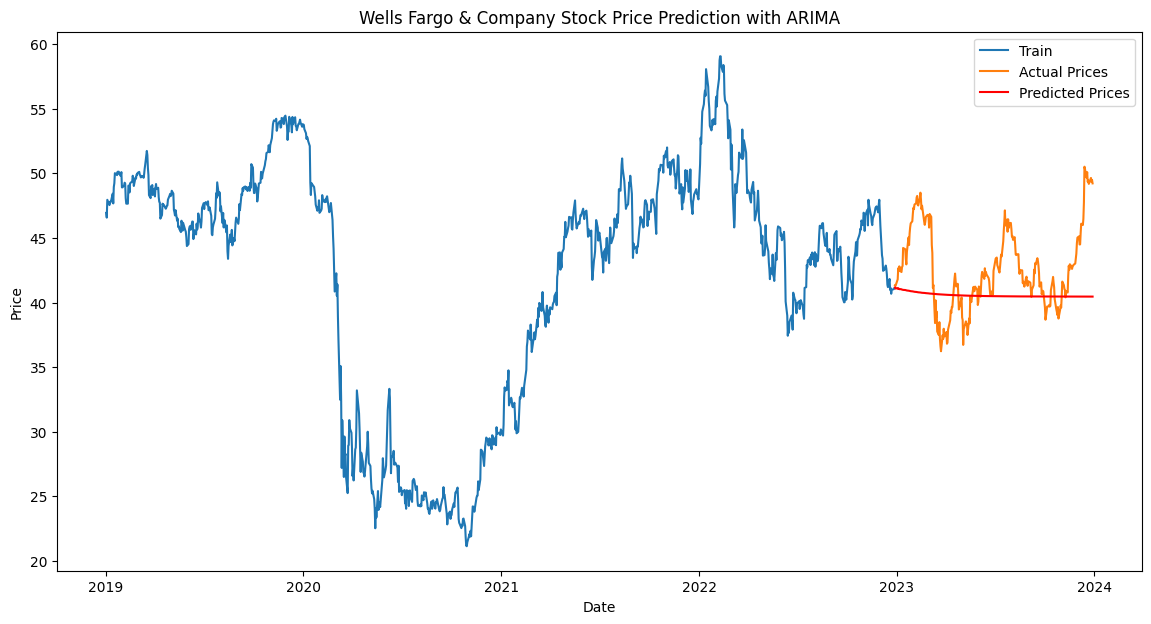

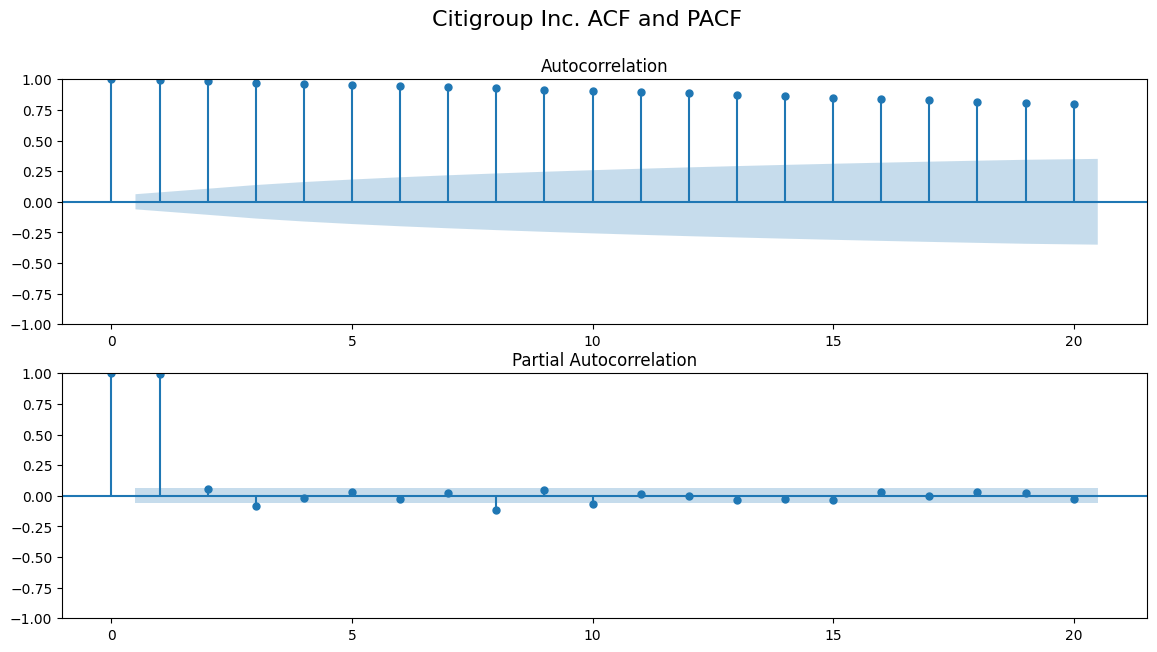

<ipython-input-44-ebb578ac40a3>:34: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100


Citigroup Inc. ARIMA Model Performance:
Root Mean Squared Error (RMSE): 3.826382431269766
Mean Absolute Error (MAE): 3.225068643093198


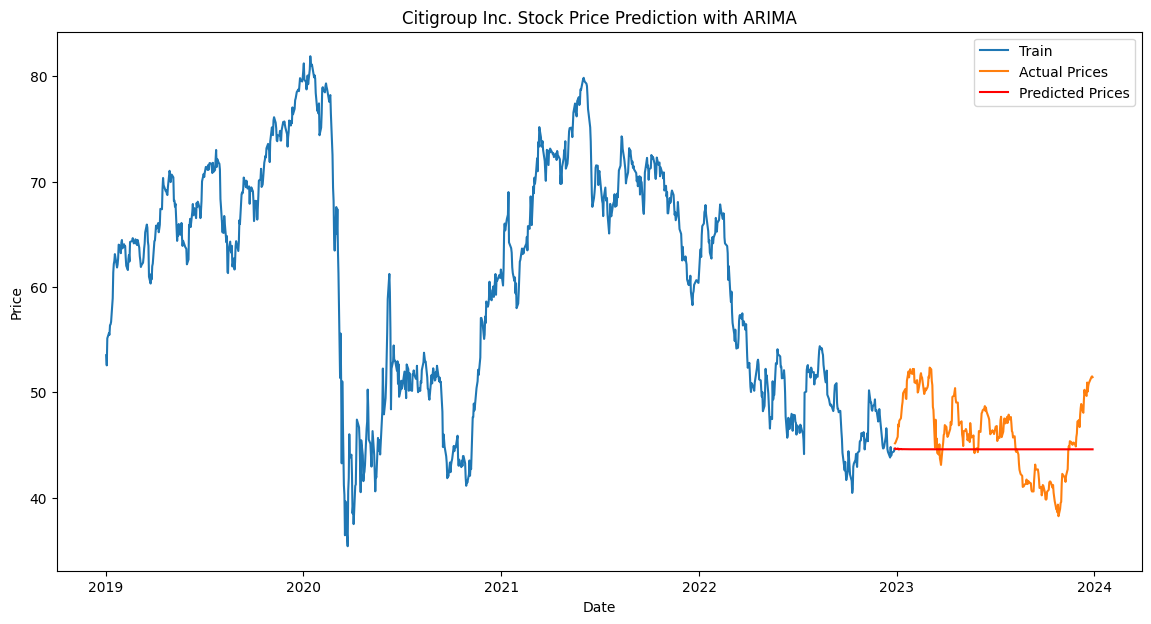

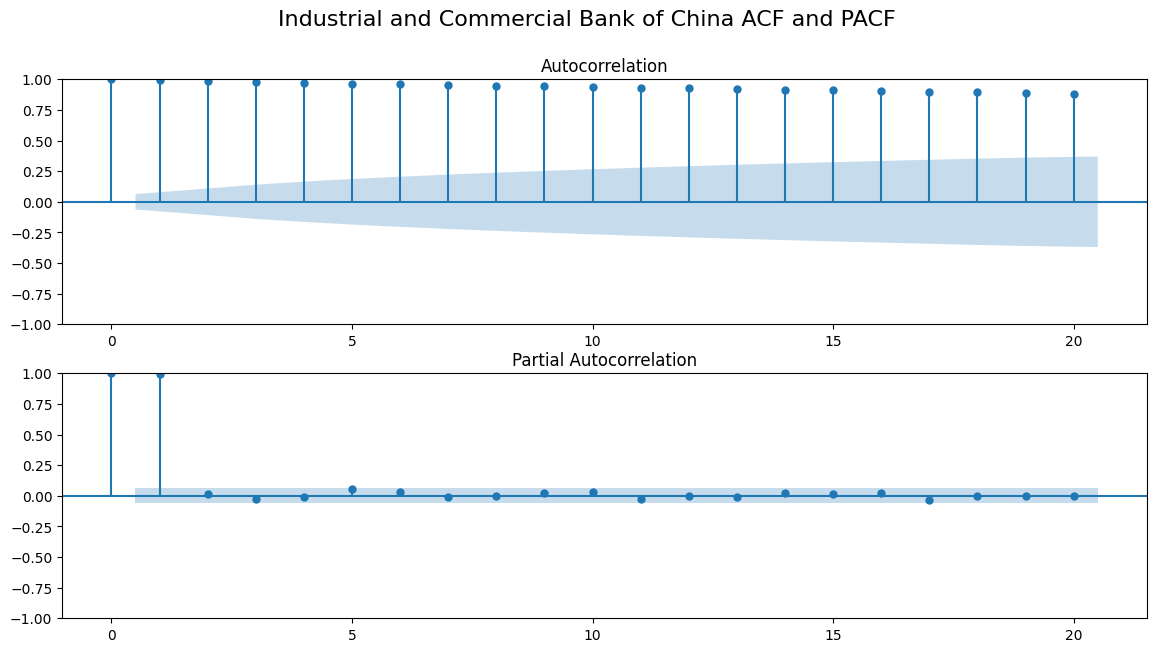

<ipython-input-44-ebb578ac40a3>:34: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100


Industrial and Commercial Bank of China ARIMA Model Performance:
Root Mean Squared Error (RMSE): 0.42574423710402337
Mean Absolute Error (MAE): 0.36814568701636813


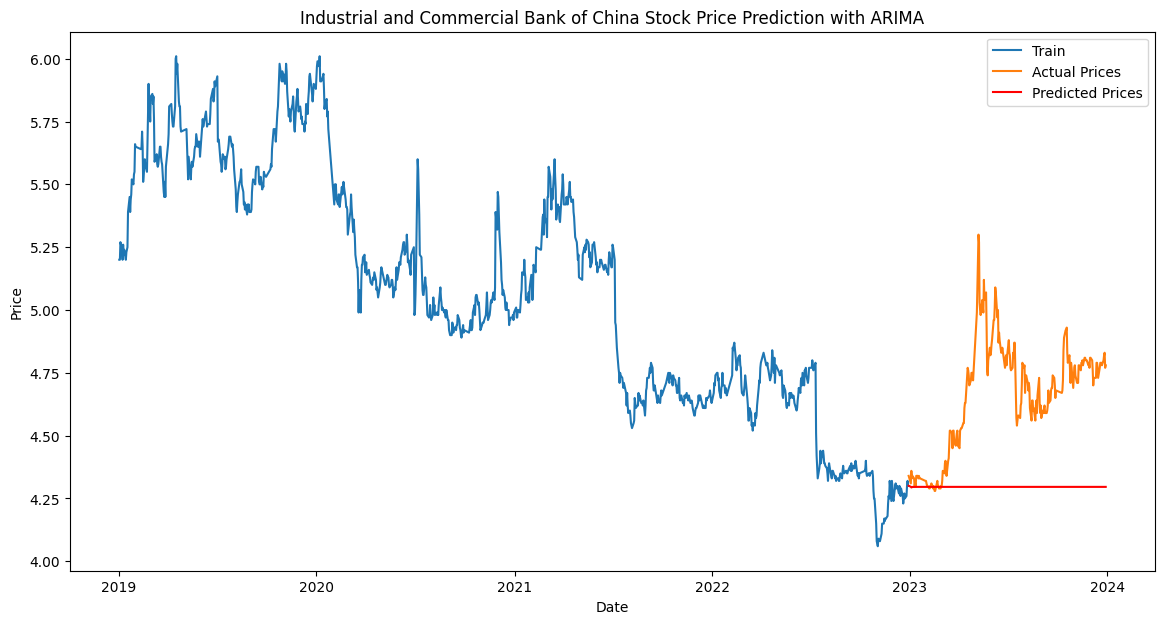

In [44]:
#Creating a DataFrame to store the performance metrics
arima_metrics = pd.DataFrame(columns=['Company', 'RMSE', 'MAE', 'MAPE'])

def forecast_and_evaluate_stock(symbol, company_name, data, forecast_steps=30):
    #Preprocessing the data
    df = data[['Close']]
    df = df.dropna()  # Remove any missing values

    #Splitting the data into training and test sets
    train_size = int(len(df) * 0.8)
    train, test = df[:train_size], df[train_size:]

    #Plotting ACF and PACF to help with model parameter selection
    plt.figure(figsize=(14, 7))
    plt.subplot(211)
    plot_acf(train['Close'], lags=20, ax=plt.gca())
    plt.subplot(212)
    plot_pacf(train['Close'], lags=20, ax=plt.gca())
    plt.suptitle(f'{company_name} ACF and PACF', fontsize=16)
    plt.show()

    #Fitting ARIMA model
    model = ARIMA(train['Close'], order=(5, 1, 2))
    model_fit = model.fit()

    #Making predictions
    start = len(train)
    end = len(train) + len(test) - 1
    predictions = model_fit.predict(start=start, end=end, typ='levels')

    #Evaluating the model
    rmse = np.sqrt(mean_squared_error(test['Close'], predictions))
    mae = mean_absolute_error(test['Close'], predictions)
    mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100

    #Appending metrics to DataFrame
    arima_metrics.loc[len(arima_metrics)] = [company_name, rmse, mae, mape]

    print(f'{company_name} ARIMA Model Performance:')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')

    #Plotting the results
    plt.figure(figsize=(14, 7))
    plt.plot(train['Close'], label='Train')
    plt.plot(test['Close'], label='Actual Prices')
    plt.plot(test.index, predictions, label='Predicted Prices', color='red')
    plt.title(f'{company_name} Stock Price Prediction with ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(False)
    plt.show()

#Forecast and evaluate for each financial institution
for symbol, company_name in financial_institutions.items():
    forecast_and_evaluate_stock(symbol, company_name, data[symbol])

LSTM Model

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.1089
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0764
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0616
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0604
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0548
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0630
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0630
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0551
Epoch 9/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0615
Epoch 10/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0701
Epoch 11/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0762
Epoch 12/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0655
Epoch 13/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0560
Epoch 14/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0711
Epoch 15/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0699
Epoc

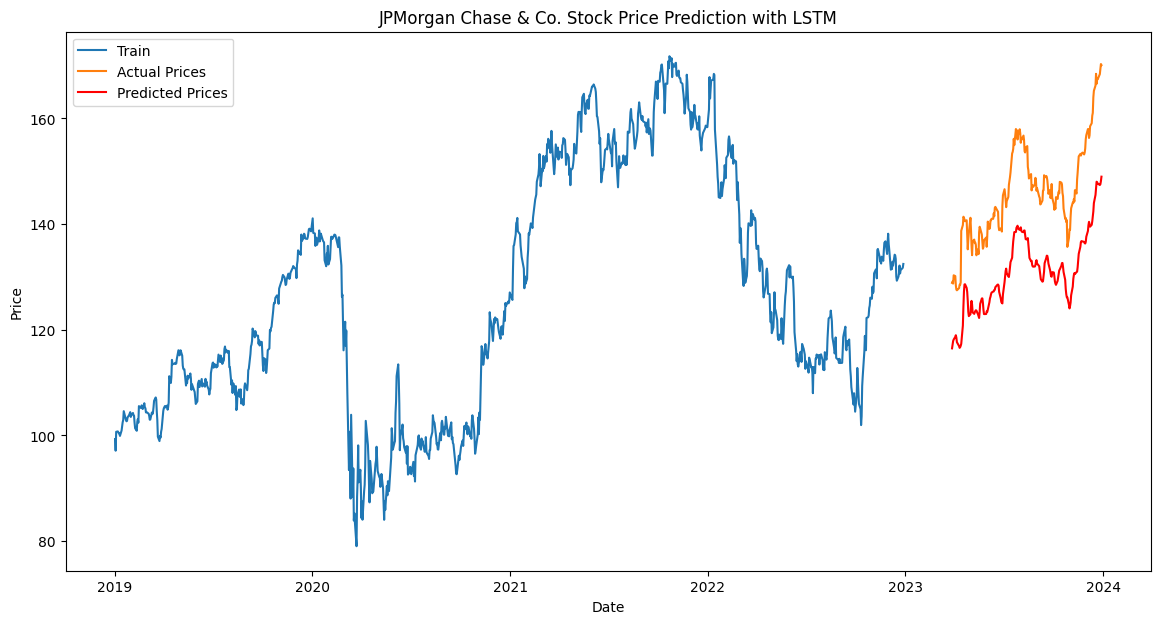

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.1244
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0677
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0569
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0671
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0729
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0788
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0499
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0640
Epoch 9/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0639
Epoch 10/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0596
Epoch 11/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0564
Epoch 12/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0531
Epoch 13/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0618
Epoch 14/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0510
Epoch 15/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0505
Epoc

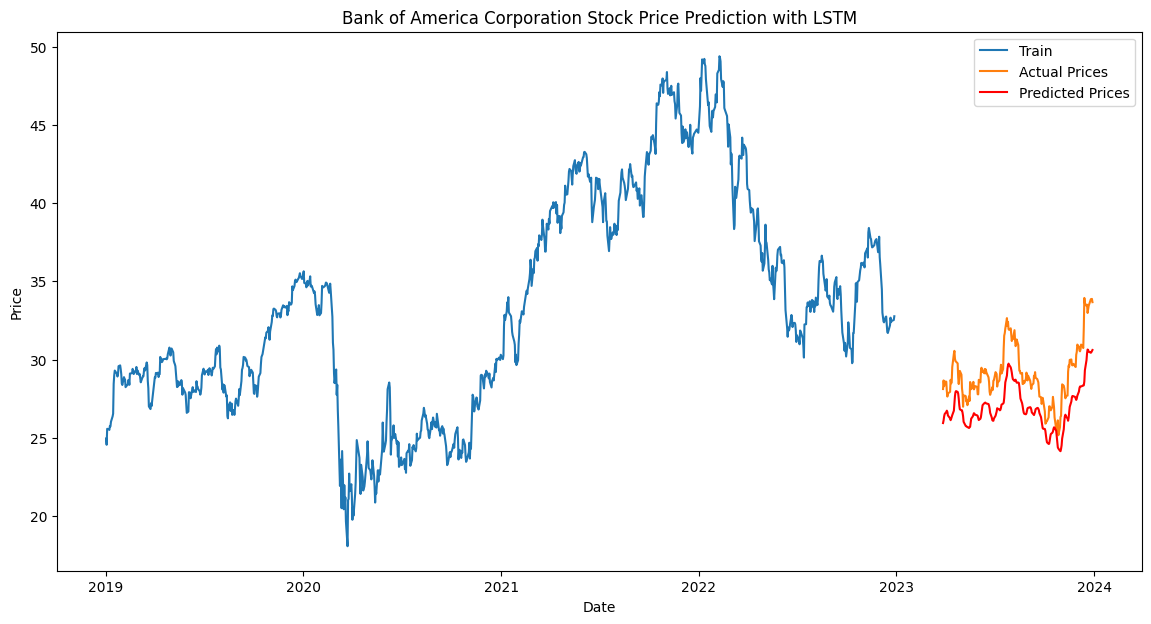

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 0.1141
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0760
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0857
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0682
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0681
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0728
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0738
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0884
Epoch 9/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0702
Epoch 10/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0765
Epoch 11/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0782
Epoch 12/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0572
Epoch 13/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0685
Epoch 14/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0662
Epoch 15/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0586
Epo

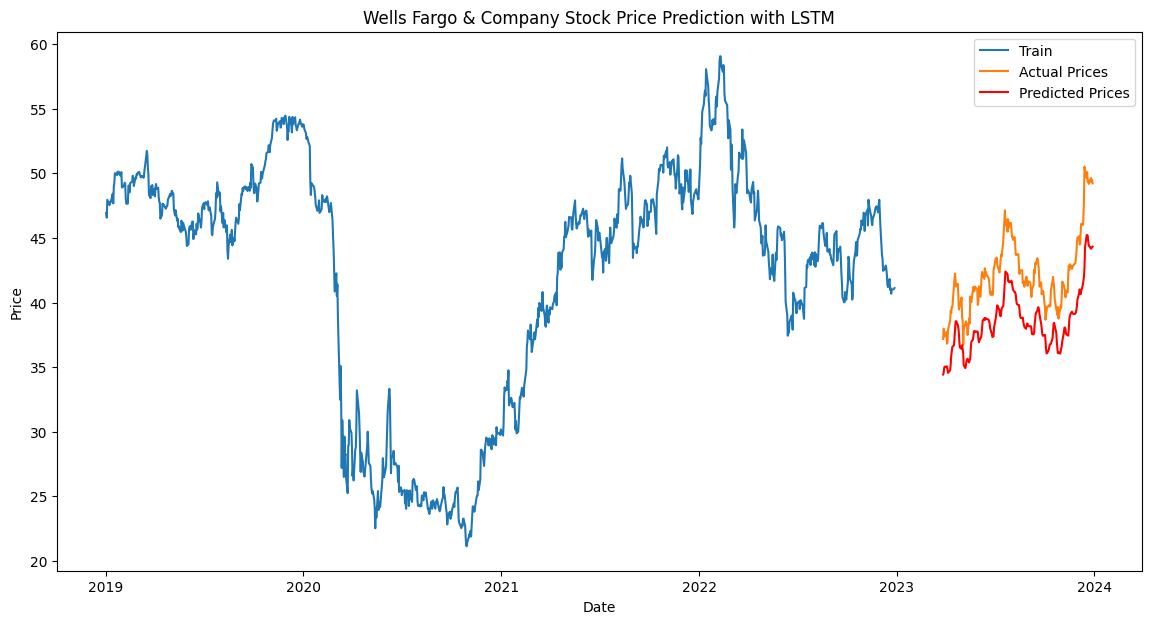

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.1091
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0673
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0710
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0648
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0798
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0752
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0870
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0672
Epoch 9/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0715
Epoch 10/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0807
Epoch 11/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0792
Epoch 12/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0829
Epoch 13/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0628
Epoch 14/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0770
Epoch 15/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0715
Epoc

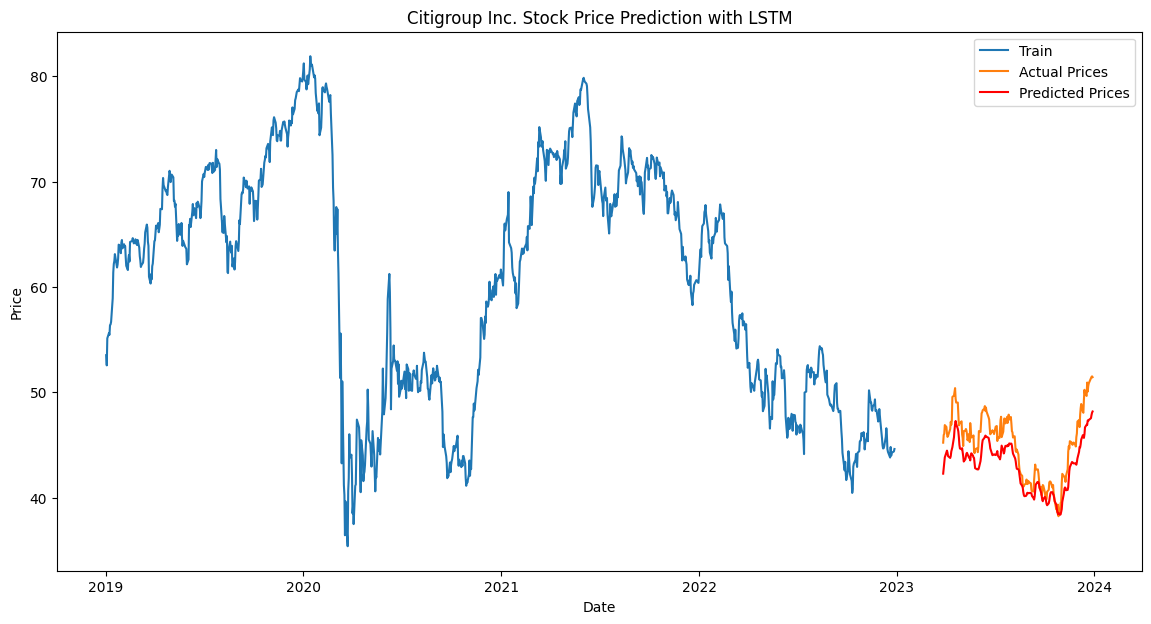

Epoch 1/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0853
Epoch 2/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0747
Epoch 3/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0731
Epoch 4/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0533
Epoch 5/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0749
Epoch 6/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0667
Epoch 7/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0511
Epoch 8/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0502
Epoch 9/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0705
Epoch 10/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0670
Epoch 11/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0620
Epoch 12/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0725
Epoch 13/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0561
Epoch 14/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0690
Epoch 15/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0584
Epoc

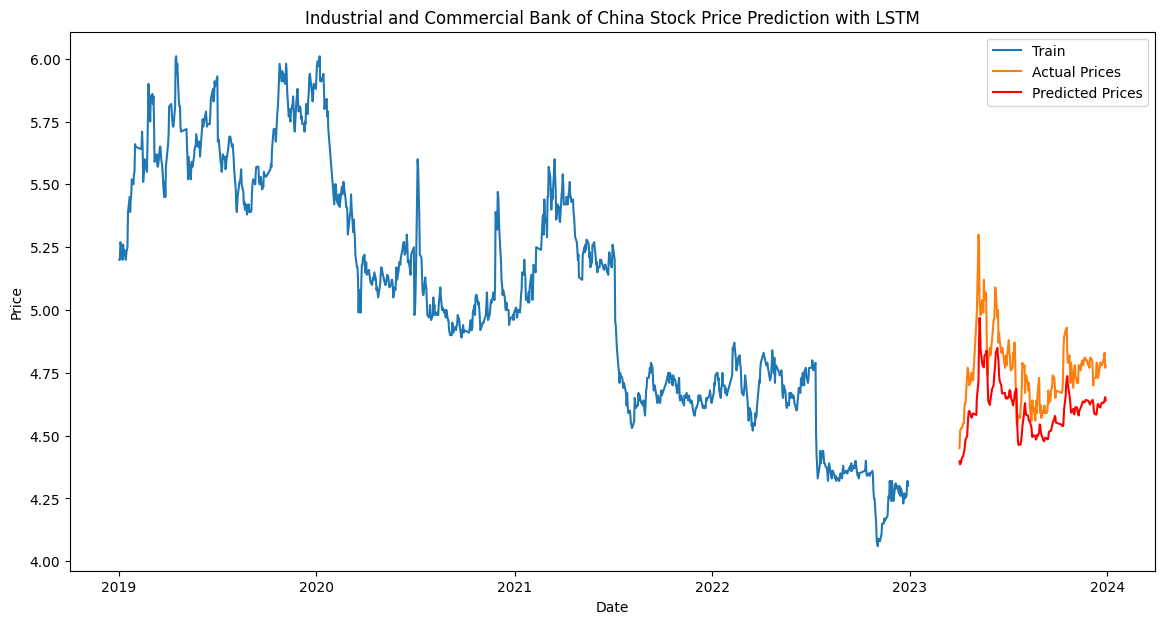

In [52]:
#Creating a DataFrame to store the performance metrics
lstm_metrics = pd.DataFrame(columns=['Company', 'RMSE', 'MAE', 'MAPE'])

def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

def train_lstm_model(symbol, company_name, data, look_back=60):
    df = data[['Close']]
    df = df.dropna()  #Remove any missing values

    #Scaling the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df)

    #Creating the training and test data
    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    X_train, y_train = create_dataset(train_data, look_back)
    X_test, y_test = create_dataset(test_data, look_back)

    #Reshaping input to be [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


    #Building the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.add(Dropout(0.2))  # Adding dropout layer to prevent overfitting


    #Compiling the model
    optimizer = Adam(learning_rate=0.001)  # Specify the learning rate here
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    #Training the model
    model.fit(X_train, y_train, batch_size=16, epochs=25)


    #Predicting the stock prices
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # Inverse transform y_test
    y_test = y_test.reshape(-1, 1)
    y_test = scaler.inverse_transform(y_test)

    #Calculating evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    #Appending metrics to DataFrame
    lstm_metrics.loc[len(lstm_metrics)] = [company_name, rmse, mae, mape]

    #Printing evaluation metrics
    print(f'{company_name} LSTM Model Performance:')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')

    #Creating a DataFrame for the predicted values
    predicted_dates = df.index[train_size + look_back:]
    predictions_df = pd.DataFrame(data=predictions, index=predicted_dates, columns=['Predictions'])

    #Plotting the results
    train = df[:train_size]
    valid = df[train_size:]
    valid = valid.iloc[look_back:]  # Align the valid data with predictions
    valid['Predictions'] = predictions_df['Predictions']

    plt.figure(figsize=(14, 7))
    plt.plot(train['Close'], label='Train')
    plt.plot(valid['Close'], label='Actual Prices')
    plt.plot(valid['Predictions'], label='Predicted Prices', color='red')
    plt.title(f'{company_name} Stock Price Prediction with LSTM')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(False)
    plt.show()

#Training and plot for each financial institution
for symbol, company_name in financial_institutions.items():
    train_lstm_model(symbol, company_name, data[symbol])


Model Comparison

<Figure size 1400x700 with 0 Axes>

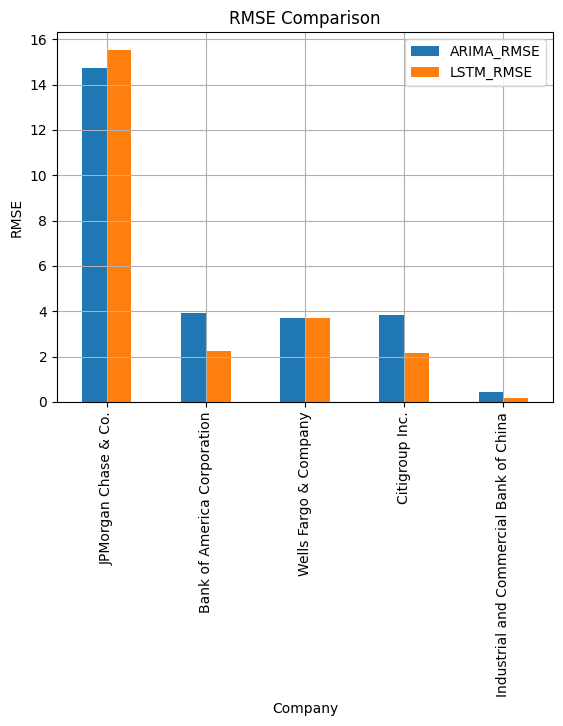

<Figure size 1400x700 with 0 Axes>

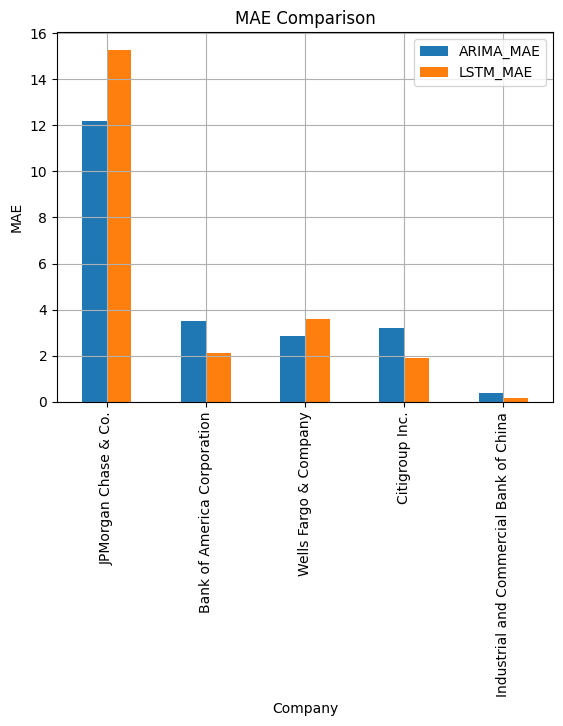

In [53]:
#Combining ARIMA and LSTM metrics
metrics_df = pd.DataFrame({
    'Company': arima_metrics['Company'],
    'ARIMA_RMSE': arima_metrics['RMSE'],
    'LSTM_RMSE': lstm_metrics['RMSE'],
    'ARIMA_MAE': arima_metrics['MAE'],
    'LSTM_MAE': lstm_metrics['MAE'],
    'ARIMA_MAPE': arima_metrics['MAPE'],
    'LSTM_MAPE': lstm_metrics['MAPE']
})

#Plotting RMSE comparison
plt.figure(figsize=(14, 7))
metrics_df.plot(x='Company', y=['ARIMA_RMSE', 'LSTM_RMSE'], kind='bar')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

#Plotting MAE comparison
plt.figure(figsize=(14, 7))
metrics_df.plot(x='Company', y=['ARIMA_MAE', 'LSTM_MAE'], kind='bar')
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

